In [1]:
%load_ext autoreload
%autoreload 2

In [138]:
import src

In [139]:
date = '2022-07-28'
suffix = '.imec0.lf.bin'
file = str(src.paths.session_path(date)) + suffix
path = src.paths.DATA / date / file

In [150]:
with open(src.paths.REF / 'date_recoffset.json', 'r') as f:
    lfpstart, lfpend = json.load(f)[date]

In [170]:
from src.data import load_behavior

In [171]:
behav = load_behavior(1)

In [248]:
from src.data import load_ephys

In [265]:
X0 = load_ephys(path, startmin=5, endmin=6, offset=lfpstart, cleaned=True)

In [266]:
from src.lfp import remove_dc_offset, combine_neighbors

In [267]:
X = X0.values
X1 = remove_dc_offset(X)
X2 = combine_neighbors(X1)
cols = X0.columns[::2] // 2

In [268]:
from src.lfp import bandpass_1_300Hz, notch_60Hz

In [269]:
X3 = bandpass_1_300Hz(X2)
X3 = notch_60Hz(X3)
lfp = pd.DataFrame(X3, index=X0.index, columns=cols)

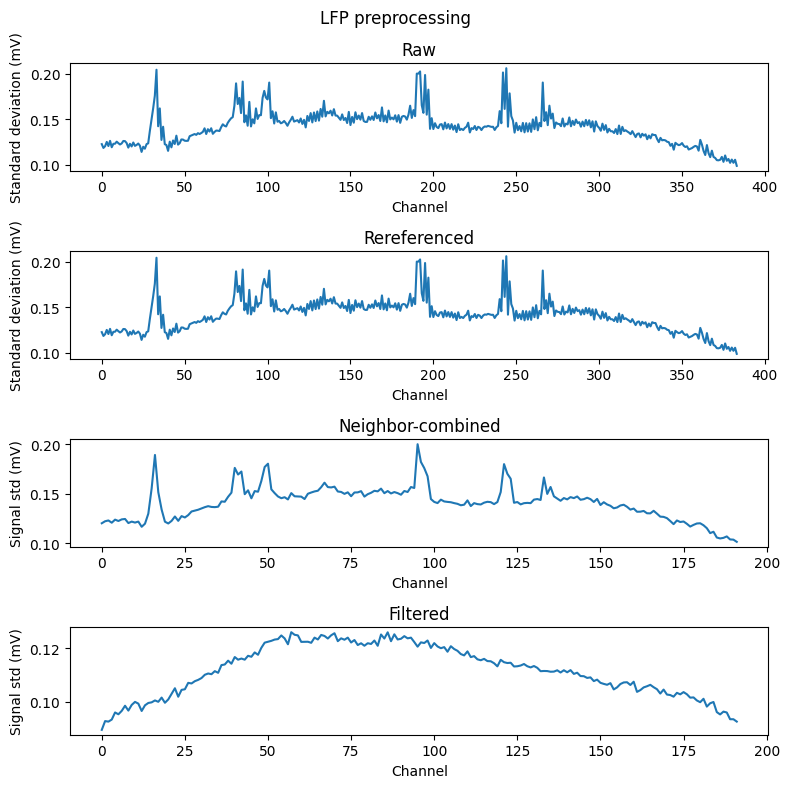

In [274]:
fig, ax = plt.subplots(4, 1, figsize=(8, 8))
plt.suptitle('LFP preprocessing')
plt.sca(ax[0])
plt.plot(X0.std(axis=0))
plt.title('Raw')
plt.xlabel('Channel')
plt.ylabel('Standard deviation (mV)')
plt.sca(ax[1])
plt.plot(X1.std(axis=0))
plt.title('Rereferenced')
plt.xlabel('Channel')
plt.ylabel('Standard deviation (mV)')
plt.sca(ax[2])
plt.plot(X2.std(axis=0))
plt.title('Neighbor-combined')
plt.xlabel('Channel')
plt.ylabel('Signal std (mV)')
plt.sca(ax[3])
plt.plot(X3.std(axis=0))
plt.title('Filtered')
plt.xlabel('Channel')
plt.ylabel('Signal std (mV)')
plt.tight_layout()
plt.savefig('lfp-preprocessing.png', dpi=200)
plt.show()